 # Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, the TMDB movies data will be analysed that were taken from Kaggle website. Three questions will be discussed which are the profit of top 10 directors, the genres that has the most budget, and to figure out if the vote count affect on the popularity of the movie or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
## Reading the file and changing release_date column type to date_time
df = pd.read_csv('tmdb-movies.csv', parse_dates=['release_date'])

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE5CEA8708>,
      dtype=object)

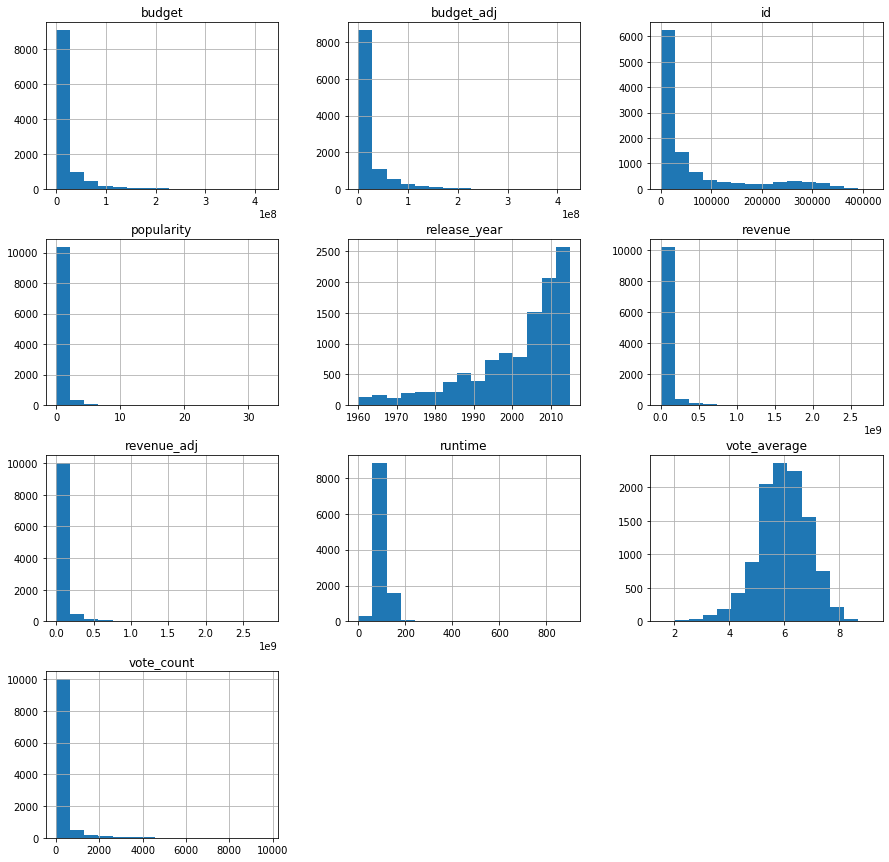

In [4]:
## General graphs for the variables
df.hist(bins = 15, figsize = (15,15))

In [5]:
## This code helps to see all the columns names on the data
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Data Cleaning (Replace this with more specific notes!)


In [10]:
## dropping the unnecessary columns that is not related to questions that will be investigated
df.drop(['imdb_id','homepage','tagline','keywords','production_companies','cast','overview','runtime'], axis = 1, inplace = True) 

In [11]:
## To make sure the columns are deleted
df.head()

,id,popularity,budget,revenue,original_title,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
##Dropping null values after removing the columns
df.dropna(axis = 0, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10801 non-null  int64         
 1   popularity      10801 non-null  float64       
 2   budget          10801 non-null  int64         
 3   revenue         10801 non-null  int64         
 4   original_title  10801 non-null  object        
 5   director        10801 non-null  object        
 6   genres          10801 non-null  object        
 7   release_date    10801 non-null  datetime64[ns]
 8   vote_count      10801 non-null  int64         
 9   vote_average    10801 non-null  float64       
 10  release_year    10801 non-null  int64         
 11  budget_adj      10801 non-null  float64       
 12  revenue_adj     10801 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: What are the highest profits for top 10 directors?

In [14]:
## Calculating profit as a new column in the dataset
df['profit_adj'] =  df['revenue_adj'] - df['budget_adj']

In [15]:
## using groupby for the director and the new column (profit_adj)
direc = df.groupby('director')['profit_adj'].sum()
direc.nlargest(10)


director
Steven Spielberg     1.305068e+10
James Cameron        6.296229e+09
George Lucas         5.844159e+09
Peter Jackson        5.644123e+09
Chris Columbus       4.353343e+09
Robert Zemeckis      4.326970e+09
Michael Bay          3.958676e+09
David Yates          3.394430e+09
Tim Burton           3.200460e+09
Christopher Nolan    3.149568e+09
Name: profit_adj, dtype: float64

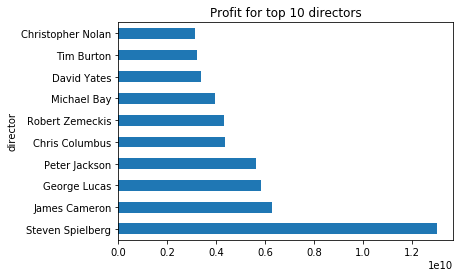

In [16]:
## The graph below shows the profit for the top 10 directors
L_direc = direc.nlargest(10)
L_direc.plot(kind = 'barh', title = 'Profit for top 10 directors')
plt.xlabel = ('Directors')
plt.ylabel = ('Profit_adj') 

### Q2: Does the vote_count affect on the popularity?

In [17]:
## first, assigning the columns into we need into a variable which is df_p
df_p = df[{'popularity', 'vote_count'}]
df_p.nlargest(20,'popularity' )

,vote_count,popularity
0,5562,32.985763
1,6185,28.419936
629,6498,24.949134
630,5612,14.311205
2,2480,13.112507
631,3848,12.971027
1329,4428,12.037933
632,2712,11.422751
3,5292,11.173104
633,3590,10.739009


In [18]:
## next, plotting these column together to see the relation in a scatter plot 
df.plot(, x='popularity', y='vote_count', kind = 'scatter', title = 'Relation between Popularity and Vote Count')


SyntaxError: invalid syntax (<ipython-input-18-7d2c6d345595>, line 2)

## Q3: Which genres has the most budget for movies?

In [ ]:
## assigning the avg of genres to budget_adj into a variable
bud = df.groupby('genres')['budget_adj'].mean()
bud.head()

In [ ]:
## getting the top 5 budgets for genres 
L_bud = bud.nlargest(5)
L_bud.head()

In [ ]:
## and finally plotting the top 5 genres in a bar graph to show the differences

L_bud = bud.nlargest(5)
L_bud.plot(x = 'budget_adj', y = 'genres', kind = 'barh', title = 'Most Costly Genres', figsize = (15,10))

<a id='conclusions'></a>
## Conclusions


After wrangling and exploring the data now it's the time to conclude this process and sum up with findings. The first question was about the profit for the top 10 directors, there's a huge difference between the first director which is Steven Soielberg who has the highest profit, beside the other 9 directors and the director who has the lower profit is christopher Nolan and his profit is about 20% of the top director Steven Soielberg. it's hard to get the limitation for the directors profit because not all the movies have the budget_adj and revenue_adj for a few movies. But, the data is enough to judge that who has the highest profit. 
The second question was about if the vote count affect on the popularity of the movies. The graph shows that when the vote count increase, also the popularity increase. If we calculated the regeression for it. probably it will show a strong positive relation between the vote count and  popularity. The popularity is differ from movie to another. Because the not all movies have the same production companies. so the voting for people is highly different from a person to another. 
Finally, the idea about the last question is whether the more genres have more budget for them or not. The graph represents the top 5 costly genres, the highest cost for the first genres are 5 genres which are Adventure, Fantasy, Action, Western, and Thriller. And the next genres nearly have the same amount of budget. But, it's not necessary to have more budget for more genres. As shown in the graph, the highest budger has 5 genres, and the lowest also have 5 genres. Another thing is the genres are not equal for most of the movies. For example, we can have a movie from the data that has the following genres Adventure, Action, Fantasy. On the other hand, we can have another movie which has these genres Adventure, Fantasy, Action, Western, Thriller. And I think that the data is enough to answer this question. 
The most difficulity that I faced in graphing is how to label the axis. Because some data are assigned into a variable, which make it have more steps in graphing. 